(150, 4)
🔁 Starting unsupervised SNN training...
Starting training...


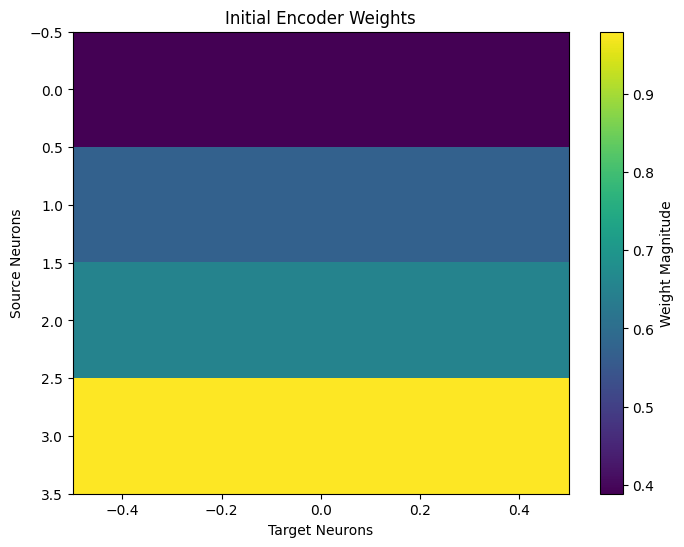

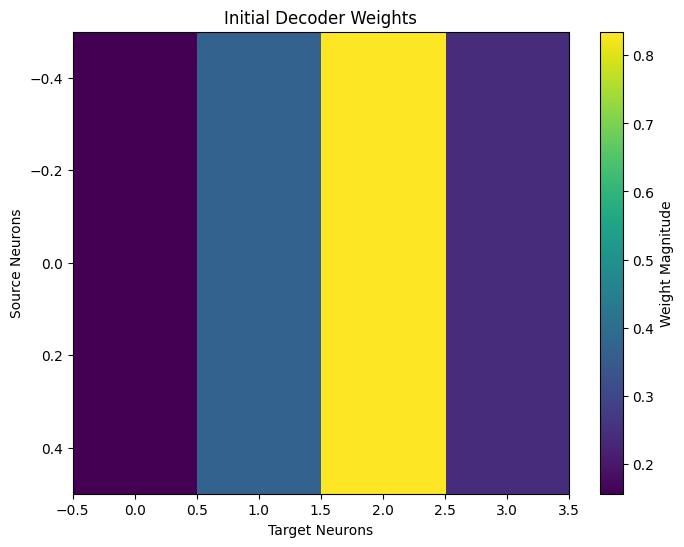

ValueError: Length of the indices and times array must match, but 4 != 3

In [1]:
import numpy as np
from brian2 import ms
from snn_autoencoder import SNN_Autoencoder
from rce_model import RCEModel
from rbf_model import RBFModel
from snn_classifier_pipeline import SNN_ClassifierPipeline
from main import load_and_preprocess_data
from utils_model import visualize_latent_space, plot_snn_connections
from utils import plot_confusion_matrix, print_classification_report
# This is a simple example of how to use the SNN_ClassifierPipeline with an SNN autoencoder and RCE or RBF classifier.
# The SNN_ClassifierPipeline is designed to work with any classifier that has fit and predict methods.
# Make sure to install the required libraries:
# pip install brian2 numpy scikit-learn
# Import necessary libraries


# Step 1: Create your dataset
X, y, target_names = load_and_preprocess_data('iris')
print(np.array(X).shape)
# Step 2: Initialize components
snn = SNN_Autoencoder(input_size=4, hidden_size=1, sim_time=100*ms, learning_rate=0.1)
rce = RCEModel(gamma=1.0, learning_rate=0.5)
# OR
rbf = RBFModel(gamma=0.5)

# Step 3: Build pipeline
pipeline = SNN_ClassifierPipeline(snn_model=snn, classifier=rbf)  # or classifier=rbf

# Example:

pipeline.train(X, y, snn_epochs=10)


# Predict
y_pred = pipeline.predict(X)

# Plot confusion matrix
plot_confusion_matrix(y, y_pred, class_names=target_names)

# Print classification report
print_classification_report(y, y_pred)

plot_snn_connections(snn, title="SNN Connections After Training")
